In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load the time series data
#loaded a test data from all combined data of normal and attack
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['test.csv']))


Saving test.csv to test (2).csv


In [ ]:
df_agg = df.groupby(['Sensor', '_Timestamp']).agg({'Value': 'sum'}).reset_index()


In [ ]:
graph = nx.DiGraph()

In [ ]:
# Iterate over the rows and add edges with weights
for i in range(len(df_agg)):
    sensor = df_agg.loc[i, 'Sensor']
    timestamp = df_agg.loc[i, '_Timestamp']
    value = df_agg.loc[i, 'Value']
    graph.add_edge(sensor, timestamp, weight=value)


In [ ]:
# Compute PageRank scores
pagerank_scores = nx.pagerank(graph)

In [ ]:
# Identify anomalous nodes based on PageRank scores
threshold = 0.05 # Set a threshold for anomaly detection
anomalous_nodes = [sensor for sensor, score in pagerank_scores.items() if score < threshold]


In [ ]:
#  Plot the graph, highlighting anomalous nodes
pos = nx.spring_layout(graph)  # Positions for the nodes


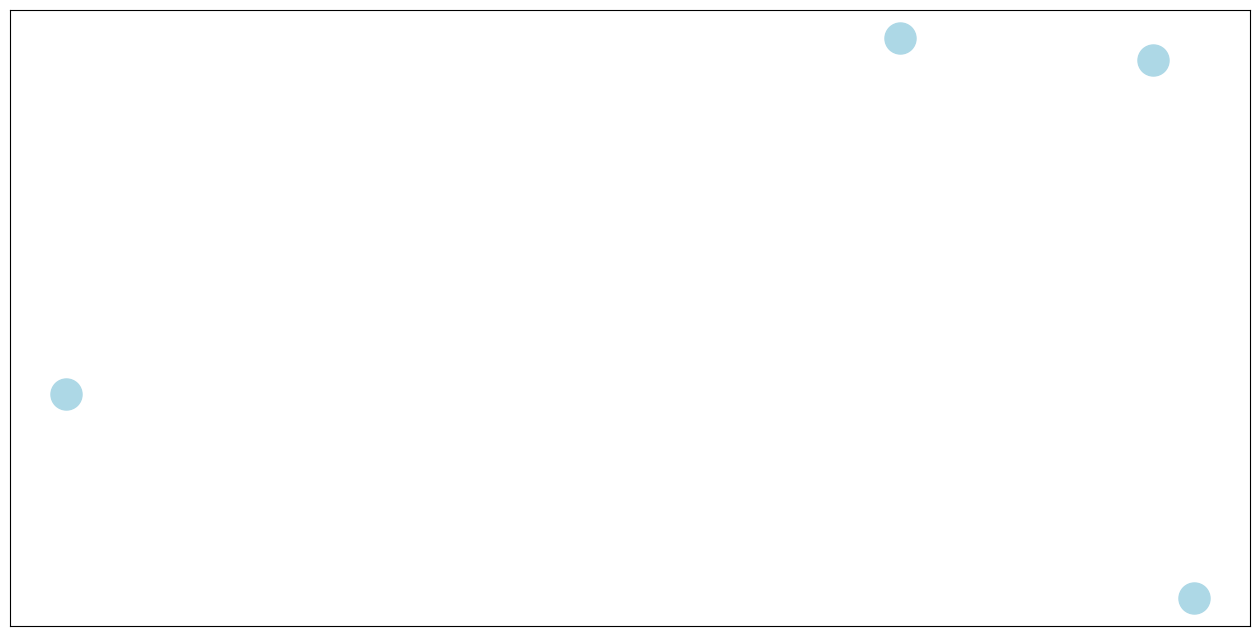

In [ ]:
# Draw normal nodes
fig, ax = plt.subplots(figsize=(16, 8))

nx.draw_networkx_nodes(graph, pos, nodelist=list(set(pagerank_scores.keys()) - set(anomalous_nodes)), node_color='lightblue', node_size=500)


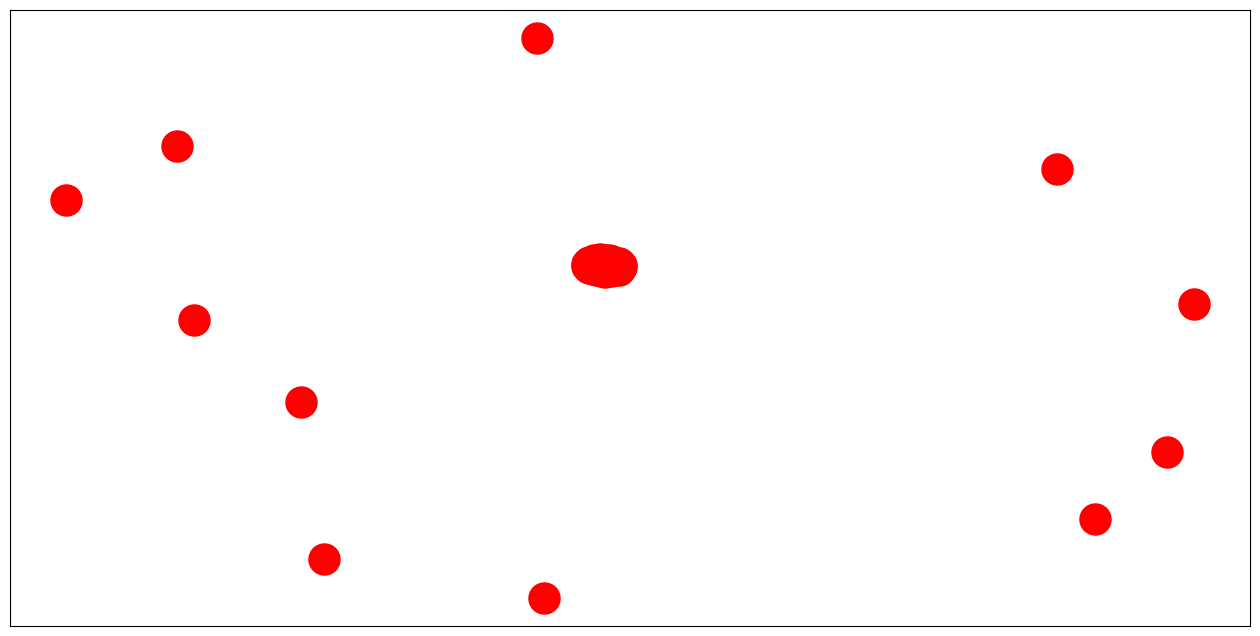

In [ ]:
# Draw anomalous nodes with a different color
fig, ax = plt.subplots(figsize=(16, 8))
nx.draw_networkx_nodes(graph, pos, nodelist=anomalous_nodes, node_color='red', node_size=500)



{('AIT201',
  '22/12/2015_4:30:00_PM'): Text(0.2530157893759362, -0.30115880045200477, '251.9226'),
 ('AIT201',
  '22/12/2015_4:30:01_PM'): Text(-0.40074069360799447, -0.2002148938878912, '251.9226'),
 ('AIT201',
  '22/12/2015_4:30:02_PM'): Text(0.17475425377800785, 0.3891918333211075, '251.9226'),
 ('AIT201',
  '22/12/2015_4:30:03_PM'): Text(0.3580307488137164, -0.09499432200823393, '251.9226'),
 ('AIT202',
  '22/12/2015_4:30:00_PM'): Text(0.25342273223296874, -0.2993231573190719, '8.313446'),
 ('AIT202',
  '22/12/2015_4:30:01_PM'): Text(-0.40033375075096195, -0.1983792507549583, '8.313446'),
 ('AIT202',
  '22/12/2015_4:30:02_PM'): Text(0.17516119663504037, 0.39102747645404046, '8.313446'),
 ('AIT202',
  '22/12/2015_4:30:03_PM'): Text(0.3584376916707489, -0.09315867887530101, '8.313446'),
 ('AIT203',
  '22/12/2015_4:30:00_PM'): Text(0.25346548098535665, -0.300986970150934, '312.7916'),
 ('AIT203',
  '22/12/2015_4:30:01_PM'): Text(-0.40029100199857404, -0.20004306358682047, '312.7916')

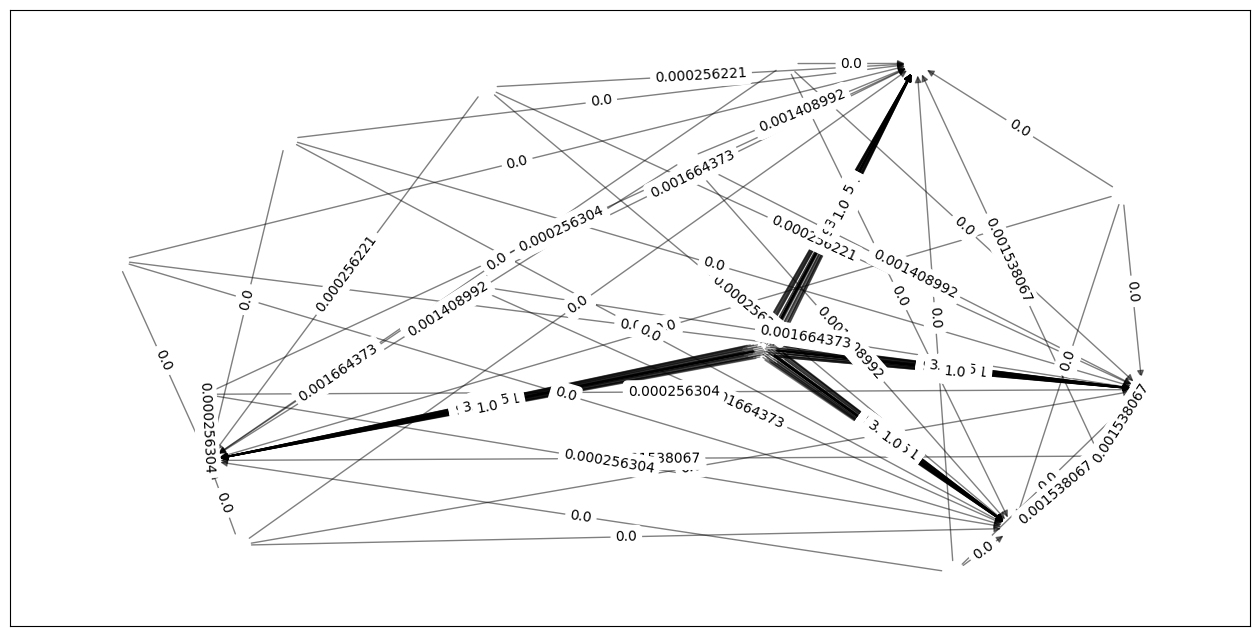

In [ ]:
# Draw edges with weights as labels
fig, ax = plt.subplots(figsize=(16, 8))

edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edges(graph, pos, alpha=0.5)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)



{'AIT201': Text(0.05114885052452848, -0.03519472774896862, 'AIT201\n0.011'),
 '22/12/2015_4:30:00_PM': Text(0.45488272822734394, -0.567122873155041, '22/12/2015_4:30:00_PM\n0.113'),
 '22/12/2015_4:30:01_PM': Text(-0.8526302377405174, -0.36523506002681383, '22/12/2015_4:30:01_PM\n0.113'),
 '22/12/2015_4:30:02_PM': Text(0.2983596570314872, 0.8135783943911836, '22/12/2015_4:30:02_PM\n0.113'),
 '22/12/2015_4:30:03_PM': Text(0.6649126471029043, -0.15479391626749925, '22/12/2015_4:30:03_PM\n0.113'),
 'AIT202': Text(0.05196273623859352, -0.031523441483102765, 'AIT202\n0.011'),
 'AIT203': Text(0.05204823374336934, -0.034851067146827105, 'AIT203\n0.011'),
 'AIT401': Text(0.6328337515595112, 0.42841643636873045, 'AIT401\n0.011'),
 'AIT402': Text(0.05102781428674043, -0.034614096827166076, 'AIT402\n0.011'),
 'AIT501': Text(0.05369523633593087, -0.036914167245573754, 'AIT501\n0.011'),
 'AIT502': Text(0.05061748704178189, -0.03460809060024193, 'AIT502\n0.011'),
 'AIT503': Text(0.05134924622370472, 

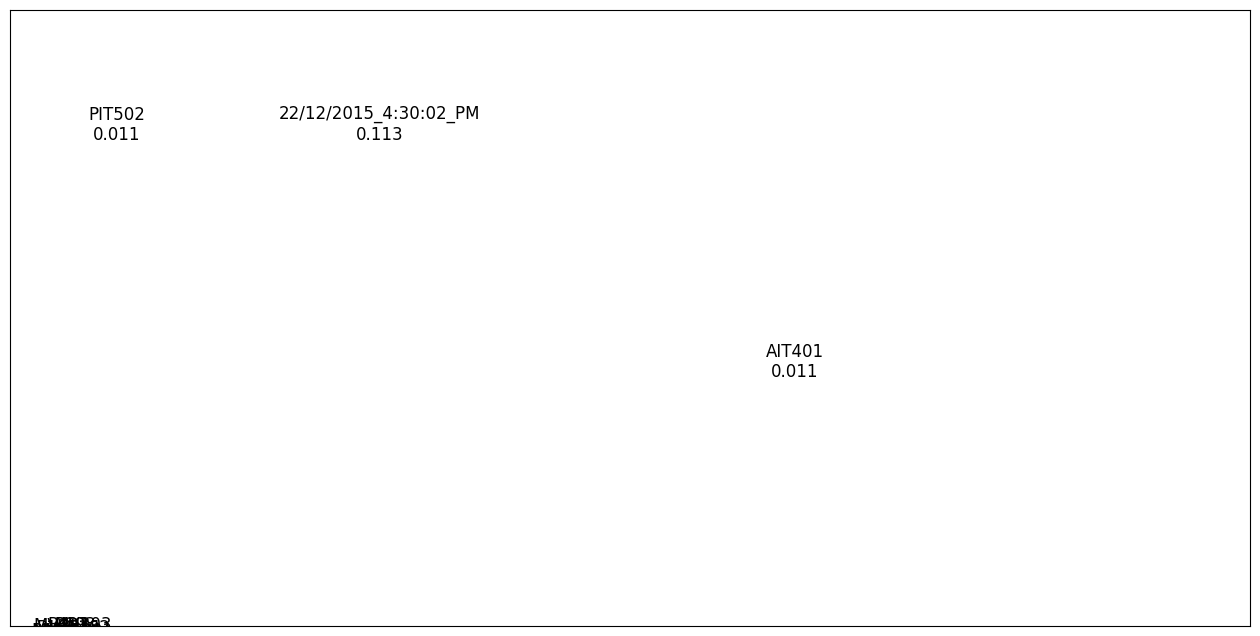

In [ ]:
# Draw labels for high PageRank scores
fig, ax = plt.subplots(figsize=(16, 8))

node_labels = {sensor: f"{sensor}\n{score:.3f}" for sensor, score in pagerank_scores.items()}
nx.draw_networkx_labels(graph, pos, labels=node_labels)


In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 8))

ax.set_axis_off()
plt.show()
